## Boston Marathon Data:

### 1. Importing:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from IPython.display import Markdown
%matplotlib inline

In [3]:
df = pd.read_csv('2014BostonMarathon.csv')

### 2. Exploratory Analysis and Cleaning:

#### A. Null Values and Dropping Some:

In [4]:
# Looking at null-values:

starting_row_ct = len(df)
starting_nulls = pd.DataFrame(df.isna().sum())
starting_nulls = starting_nulls.where(starting_nulls.values != 0).dropna()

   Here is our starting row count: {{starting_row_ct}}.  
    
   We will wait before doing anything with a significant number of null-values, but it is good to know where
    our null-values are before setting out on further exploration. In this table we have removed all of the
    columns which do not have null-values, and isolated the columns that do have null-values: {{starting_nulls}}
        
   In the cell below, we will drop our 'Citizenship' feature (since it is similar to/overly-correlated with 
    our 'Country' feature). We will also drop the singular null-value in 'City', as it will be inconsequential
    and will lesson our errors as we move forward.

In [5]:
# Dropping 'Citizenship':

df.drop('ctz', axis = 1, inplace = True)

# Dropping the null-value in 'City':

df.dropna(axis = 0, how = 'any', subset = ['city'], inplace = True)

#### B. Understanding the Structure and Distrubution:

In [6]:
object_descr = df.describe(include = 'O')
num_descr = df.describe()
objects = pd.DataFrame(df.dtypes.loc[df.dtypes == 'O'])
ints = pd.DataFrame(df.dtypes.loc[df.dtypes == 'int64'])
floats = pd.DataFrame(df.dtypes.loc[df.dtypes == 'float'])

> Here, we have our feature-set and its corresponding data-types.  We can see that a lot
of our columns which we would expect to be numerical are, in fact, object-types. This shouldn't be too troublesome, but is always helpful to know as we move forward.

<table width = '600' height = '100'  align = 'center'>
    <tr>
    </tr>
    <tr>
        <td> {{objects}} </td>
        <td> {{ints}}    </td>
        <td> {{floats}} </td>
    </tr>
</table>

>Here we have our descriptive statistics:
 Based on these, we can see that a majority of the participants are male, and the most
 predominant state represented was Massachusets (makes sense). 


<table width = '1000' align = 'center'>
    <tr> 
    </tr>
    <tr>
        <table align = 'center' >
            <tr>  
                <td style = 'text-align:center'> Numeric Columns </td>
            </tr>
            <tr>
                <td> {{num_descr}} </td>
            </tr>
        </table>
    </tr>
</table>


<table width = '1400' align = 'center'>
    <tr> 
        <table align = 'center'>
            <tr>
               <td style = 'text-align:center'> Object Columns </td> 
            </tr>
            <tr>
               <td> {{object_descr}} </td>
            </tr>
        </table>
    </tr>    
</table>



#### C. Dash Control:

In [7]:
# Had to take care of some dashes within the dataset ('-'), which were making it difficult to run models.  
# Did not want to drop these since that would cause a lot of information loss

import re

df['5k'] = df['5k'].replace(to_replace = '-', value = np.nan)
df['10k'] = df['10k'].replace(to_replace = '-', value = np.nan)
df['20k'] = df['20k'].replace(to_replace = '-', value = np.nan)
df['25k'] = df['25k'].replace(to_replace = '-', value = np.nan)
df['30k'] = df['30k'].replace(to_replace = '-', value = np.nan)
df['35k'] = df['35k'].replace(to_replace = '-', value = np.nan)
df['40k'] = df['40k'].replace(to_replace = '-', value = np.nan)
df['half'] = df['half'].replace(to_replace = '-', value = np.nan)

#### D. Dummy Control:

In [8]:
# Had to do some grouping to control dummies:
EUR = ['TUR', 'HUN', 'LUX', 'UKR', 'BLR', 'CRO', 'EST', 'SVK', 'SLO', 'POR', 'GRE', 'CZE', 'ROU', 'LIE',
       'POL', 'AUT', 'NOR', 'BEL', 'FIN', 'ISL']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in EUR), other = 'EUR')

SEA = ['PHI', 'THA', 'MAS', 'INA', 'NZL']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in SEA), other = 'SEA')

AFR = ['EGY', 'ZIM', 'TAN', 'ETH', 'MAR', 'KEN', 'RSA']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in AFR), other = 'AFR')

CAM = ['PAN', 'DOM', 'BAH', 'CAY', 'VGB', 'BAR', 'ESA', 'GUA', 'CRC', 'BER']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in CAM), other = 'CAM')

SAM = ['ECU', 'BOL', 'TRI', 'PER', 'URU', 'ARG', 'CHI', 'VEN']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in SAM), other = 'SAM')

MEA = ['QAT', 'BRN', 'ISR', 'UAE']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in MEA), other = 'MEA')

ASI = ['IND', 'RUS', 'TPE', 'SIN']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in ASI), other = 'ASI')

#### E. Error NaN/Inf Error Mitigation:

In [9]:
# Was getting an NaN, Inf, Value Too Large error when running the preliminary models. So: 

df['pace'] = pd.to_numeric(df['pace'], downcast = 'float')
df['official'] = pd.to_numeric(df['official'], downcast = 'float')

#### F. Preliminary Visualizations:

##### F-1. Correlation:

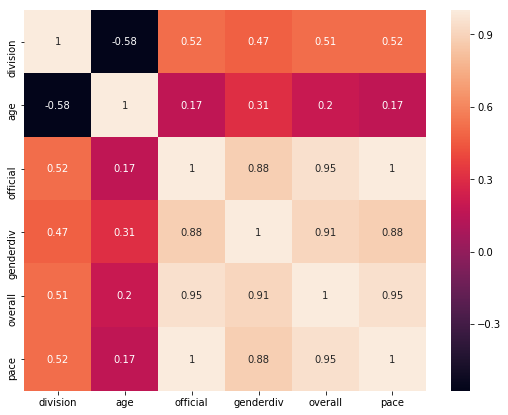

In [10]:
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

##### F-2. Univariate Distributions:

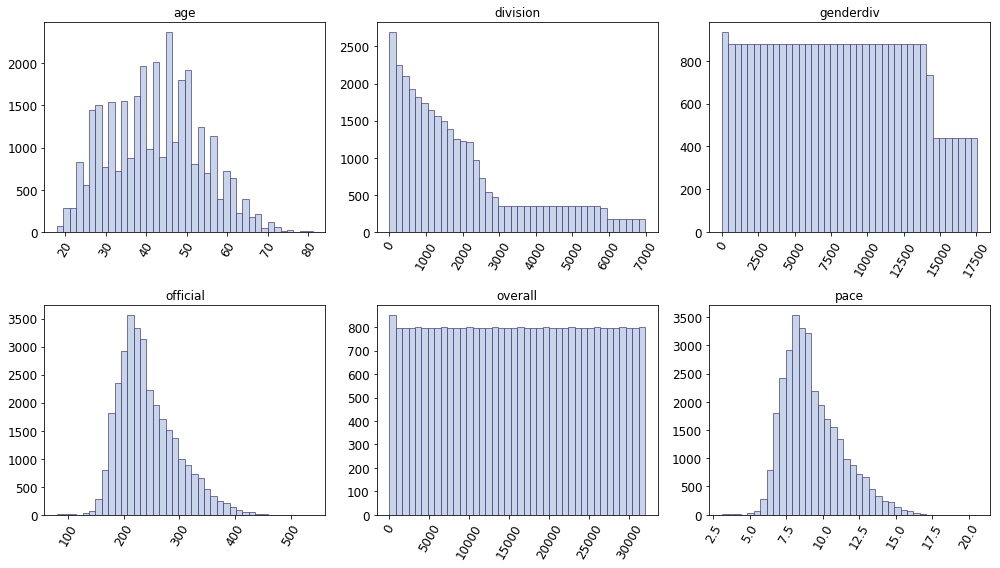

In [11]:
# Looking at our numeric columns:

numeric_cols = df[['division', 'age', 'official', 'genderdiv', 'overall', 'pace']]

numeric_cols.hist(bins = 40,
                  figsize = (14, 8), layout = [2, 3],
                  xlabelsize = 12, ylabelsize = 12, 
                  xrot = 60,
                  color = 'lightsteelblue', edgecolor = 'darkslateblue',
                  grid = False, alpha = .7)
plt.tight_layout()
plt.show()

It makes sense here that 'genderdiv' and 'overall' would be so evenly dispersed, given that gender is split relatively evenly for the participants in 2014.  Overall placement as well would be distributed evenly since you increment each placement each time you add one person.  Thus, each bin in the histogram would get a similar amount of participants.
'Official,' 'age,' 'division' and 'pace,' however, have more normal distributions, as we see above.

In [41]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = 'most_frequent')
nan_columns_1 = imputer.fit_transform(df[['5k', '10k', '20k', 'half', '25k','35k','30k', '40k']])
nan_columns_1 = pd.DataFrame(nan_columns_1)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [42]:
nan_columns_1

,0,1,2,3,4,5,6,7
0,8.02,17.37,37.65,39.72,47.67,71.40,59.18,80.43
1,16.22,32.58,65.83,69.47,82.43,116.37,99.33,132.10
2,7.75,16.62,36.10,38.03,45.80,67.42,56.45,76.10
3,16.20,32.57,65.83,69.47,82.43,116.37,99.33,132.95
4,8.02,17.12,36.58,38.60,46.37,67.83,57.03,76.72
5,16.22,32.58,65.83,69.47,82.45,116.37,99.33,132.95
6,8.38,17.65,37.65,39.72,47.67,70.23,58.60,79.83
7,15.17,30.48,61.62,64.85,76.95,107.47,92.52,122.80
8,8.00,17.12,36.60,38.60,46.37,67.83,57.03,76.70
9,15.15,30.48,61.78,65.23,77.68,112.27,94.78,129.83


In [ ]:
# Looking at our object columns:

checkpts = nan_columns_1[[0, 1, 2, 3, 4, 5, 6, 7]]
b = 0

grid = plt.GridSpec(2, 4, wspace = .25, hspace = .25)

plt.subplot(grid[0, 0])
sns.countplot(x = checkpts.index, data = checkpts[0])

plt.subplot(grid[0, 1])
sns.countplot(x = checkpts.index, data = checkpts[1])

plt.subplot(grid[0, 2])
sns.countplot(x = checkpts.index, data = checkpts[2])

plt.subplot(grid[0, 3])
sns.countplot(x = checkpts.index, data = checkpts[3])

plt.subplot(grid[1, 0])
sns.countplot(x = checkpts.index, data = checkpts[4])

plt.subplot(grid[1, 1])
sns.countplot(x = checkpts.index, data = checkpts[5])

plt.subplot(grid[1, 2])
sns.countplot(x = checkpts.index, data = checkpts[6])

plt.subplot(grid[1, 3])
sns.countplot(x = checkpts.index, data = checkpts[7])


In [28]:
categoricals = df[['gender', 'state', 'country', 'city']]

checkpts_over_half = df[['25k','35k','30k', '40k']]

df.keys()

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', '35k', 'overall', 'pace', 'state', '30k', '5k', 'half',
       '20k', 'country', 'city', '40k'],
      dtype='object')

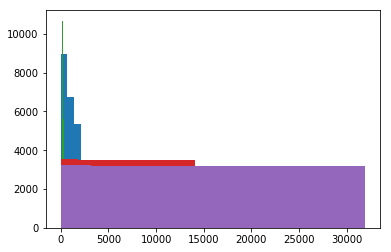

In [24]:
for column in numeric_cols:
    plt.hist(numeric_cols[column])

### Using GridSearchCV to run some preliminary models:

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

df.dropna(axis = 1, how = 'any')
end_df_len = len(df)

X = pd.get_dummies(data = df.drop(['name', 'bib', 'city', 'state', 'genderdiv'], axis = 1), columns = ['gender', 'country'])
y = df['genderdiv']

In [ ]:
# Resetting the index from a value error that I was getting:

X.reset_index()
y.reset_index()

